<h1 style='color: green; font-size: 36px; font-weight: bold;'>Analysis for health and medicine II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Known the Dataset</font>
<hr style='border: 2px solid red;'>

## About dataset
<hr>

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Our world was surprised for by a deadly disease. Since 2020 all people are taking care of themselves and fighting the disease.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Our dataset is about the covid 19 cases in the world.</p>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Province/State</b> - Province in the country - filled in the China</li>
    <li><b>Country/Region</b> - Country about the cases</li>
    <li><b>`Days`</b> - All days of the pandemic are registered - 1/22/20 at yesterday</li>
</ul>

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading data

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')    

In [3]:
japan = confirmed['Country/Region'] == 'Japan'
confirmed['is_japan'] = japan
confirmed[japan]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,is_japan
156,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,16962177,17188265,17329185,17537636,17781018,18001865,18194170,18374230,18531986,True


In [6]:
label_japan = np.where(japan, 'Japan', 'Others')
confirmed['is_label_japan'] = label_japan

# <font color='red' style='font-size: 30px;'>1.3 Cases accumulated</font>
<hr style='border: 2px solid red;'>

## Cases accumulated until yesterday 

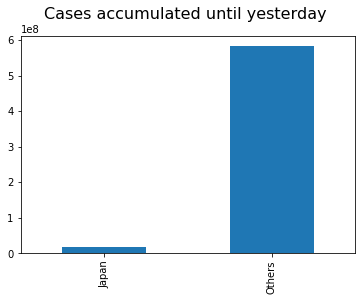

In [80]:
summed_accumulated = confirmed.groupby('is_label_japan').sum()
summed_accumulated.iloc[:, -2].plot(kind = 'bar')
plt.title('Cases accumulated until yesterday ', fontsize = 16, y = 1.05)
plt.xlabel('');

# <font color='red' style='font-size: 30px;'>1.4 Cases with differences</font>
<hr style='border: 2px solid red;'>

## Cases yesterday

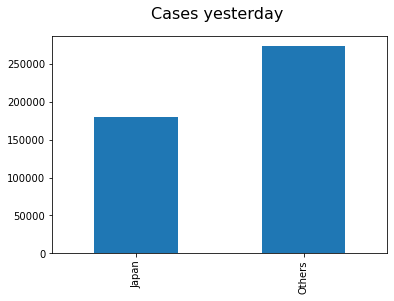

In [92]:
summed = confirmed.groupby('is_label_japan').sum().iloc[:, 2: -1].diff(axis = 1).dropna(axis = 1)

summed.iloc[:, -2].plot(kind = 'bar')
plt.title('Cases yesterday ', fontsize = 16, y = 1.05)
plt.xlabel('');

## Development of confirmed cases in the last month

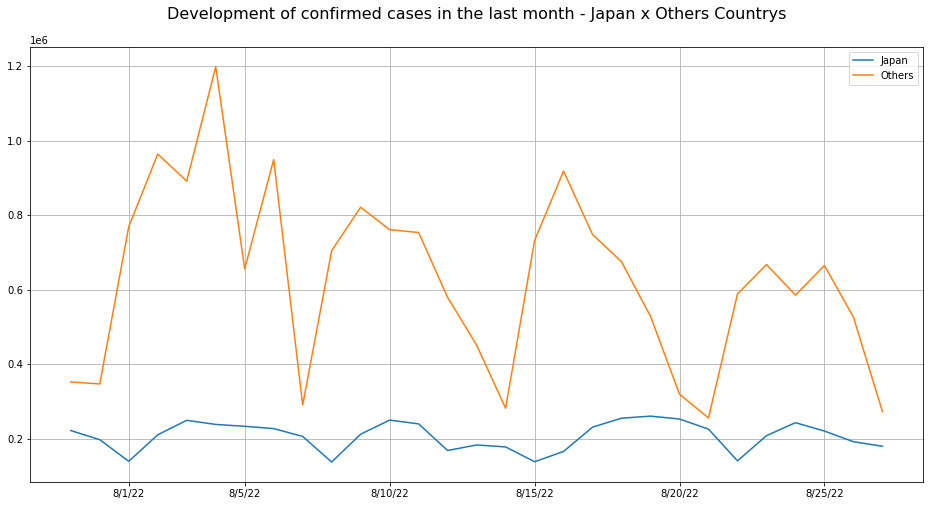

In [93]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))
ax.plot(summed.T[-30: -1]);
ax.set_title("Development of confirmed cases in the last month - Japan x Others Countrys", fontsize = 16, y = 1.05)
ax.grid(True)
ax.legend(summed.T.columns)

ax.set_xticks(['8/1/22', '8/5/22', '8/10/22', '8/15/22', '8/20/22', '8/25/22']);